In [53]:
# 라이브러리 호출 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier 

In [54]:
# 데이터셋 읽기
df = pd.read_csv("housingdata.csv")

In [55]:

# - CRIM - per capita crime rate by town 
# (**마을별 1인당 범죄율)**
# - ZN - proportion of residential land zoned for lots over 25,000 sq.ft. 
# (25,000평방피트 이상의 부지에 대해 구획된 주거용 토지의 비율.)
# - INDUS - proportion of non-retail business acres per town.
# - CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# - NOX - nitric oxides concentration (parts per 10 million)
# - RM - average number of rooms per dwelling
# (**주거당 평균 객실 수)**
# - AGE - proportion of owner-occupied units built prior to 1940
# (**1940년 이전에 지어진 소유주 점유의 비율)**
# - DIS - weighted distances to five Boston employment centres
# (**보스턴 고용 센터 5곳까지의 가중 거리)**
# - RAD - index of accessibility to radial highways
# (**방사형 고속도로 접근성 지수)**
# - TAX - full-value property-tax rate per $10,000
# (**$10,000당 전액 재산세율)**
# - PTRATIO - pupil-teacher ratio by town
# - B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# (마을별 흑인 비율입니다)
# - LSTAT - % lower status of the population
# - MEDV - Median value of owner-occupied homes in $1000's
# (**소유주가 거주하는 주택의 중간값 $1000$s)**|

In [56]:
df # 데이터프레임 확인

,Unnamed: 0,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222,18.7,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,273,21.0,NaN,22.4
502,502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,273,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,273,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,273,21.0,6.48,22.0


In [57]:
# 30개의 데이터 출력
(df.head(30)) 

,Unnamed: 0,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222,18.7,NaN,36.2
5,5,0.02985,0.0,2.18,0.458,6.430,58.7,6.0622,222,18.7,5.21,28.7
6,6,0.08829,12.5,7.87,0.524,6.012,66.6,5.5605,311,15.2,12.43,22.9
7,7,0.14455,12.5,7.87,0.524,6.172,96.1,5.9505,311,15.2,19.15,27.1
8,8,0.21124,12.5,7.87,0.524,5.631,100.0,6.0821,311,15.2,29.93,16.5
9,9,0.17004,12.5,7.87,0.524,6.004,85.9,6.5921,311,15.2,17.10,18.9


In [58]:
print(df)
df_sampled = df. sample(n=5) # 컬럼별로 데이터5개를  생성 

     Unnamed: 0     CRIM    ZN  INDUS    NOX     RM   AGE     DIS  TAX  \
0             0  0.00632  18.0   2.31  0.538  6.575  65.2  4.0900  296   
1             1  0.02731   0.0   7.07  0.469  6.421  78.9  4.9671  242   
2             2  0.02729   0.0   7.07  0.469  7.185  61.1  4.9671  242   
3             3  0.03237   0.0   2.18  0.458  6.998  45.8  6.0622  222   
4             4  0.06905   0.0   2.18  0.458  7.147  54.2  6.0622  222   
..          ...      ...   ...    ...    ...    ...   ...     ...  ...   
501         501  0.06263   0.0  11.93  0.573  6.593  69.1  2.4786  273   
502         502  0.04527   0.0  11.93  0.573  6.120  76.7  2.2875  273   
503         503  0.06076   0.0  11.93  0.573  6.976  91.0  2.1675  273   
504         504  0.10959   0.0  11.93  0.573  6.794  89.3  2.3889  273   
505         505  0.04741   0.0  11.93  0.573  6.030   NaN  2.5050  273   

     PTRATIO  LSTAT  MEDV  
0       15.3   4.98  24.0  
1       17.8   9.14  21.6  
2       17.8   4.03  34.7  

In [59]:
df

,Unnamed: 0,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222,18.7,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,273,21.0,NaN,22.4
502,502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,273,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,273,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,273,21.0,6.48,22.0


In [60]:
# 데이터 로드
data = load_breast_cancer()
X = data.data
y = data.target

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [61]:
df # 데이터 확인

,Unnamed: 0,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222,18.7,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,273,21.0,NaN,22.4
502,502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,273,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,273,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,273,21.0,6.48,22.0


In [62]:

for column in df.select_dtypes(include=['float64', 'int64']):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # 이상치 조건
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # 이상치 탐지
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"컬럼 '{column}'의 이상치 개수: {len(outliers)}") # 이상치 개수 확인하기


컬럼 'Unnamed: 0'의 이상치 개수: 0
컬럼 'CRIM'의 이상치 개수: 65
컬럼 'ZN'의 이상치 개수: 63
컬럼 'INDUS'의 이상치 개수: 0
컬럼 'NOX'의 이상치 개수: 0
컬럼 'RM'의 이상치 개수: 30
컬럼 'AGE'의 이상치 개수: 0
컬럼 'DIS'의 이상치 개수: 5
컬럼 'TAX'의 이상치 개수: 0
컬럼 'PTRATIO'의 이상치 개수: 15
컬럼 'LSTAT'의 이상치 개수: 7
컬럼 'MEDV'의 이상치 개수: 40


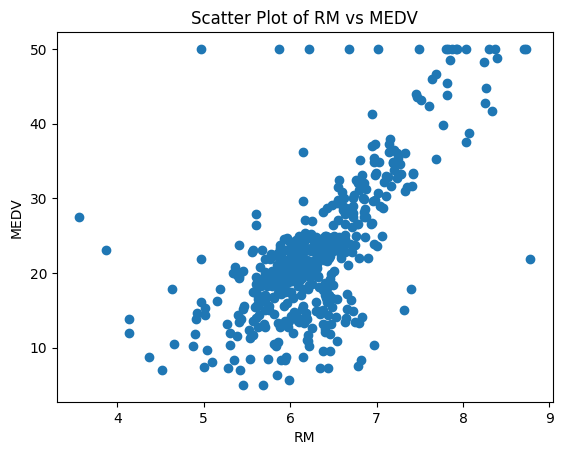

In [63]:
# 산점도로 2개 컬럼 비교
plt.scatter(df['RM'], df['MEDV'])  
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.title('Scatter Plot of RM vs MEDV')
plt.show()

In [64]:
# 이상치 제거

     # IQR 계산
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  
    Q3 = df[column].quantile(0.75)  
    IQR = Q3 - Q1                   
    
    # 이상치 조건
    lower_bound = Q1 - 1.14 * IQR
    upper_bound = Q3 + 1.14 * IQR
    
    # 이상치가 아닌 데이터만 남기기
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_cleaned

     # 수치형 데이터 요약 
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    df = remove_outliers_iqr(df, column)
print("이상치를 제거한 데이터:")
print(df.describe()) 

이상치를 제거한 데이터:
       Unnamed: 0        CRIM          ZN       INDUS         NOX          RM  \
count  177.000000  177.000000  177.000000  177.000000  177.000000  177.000000   
mean   181.406780    0.255889    4.528249    8.939831    0.505288    6.173847   
std    134.187596    0.282507    9.827304    5.305004    0.057045    0.358621   
min      0.000000    0.006320    0.000000    1.890000    0.409000    5.390000   
25%     75.000000    0.071650    0.000000    5.190000    0.449000    5.920000   
50%    131.000000    0.140520    0.000000    8.140000    0.510000    6.127000   
75%    296.000000    0.299160    0.000000   10.010000    0.544000    6.430000   
max    504.000000    1.354720   40.000000   25.650000    0.624000    7.079000   

              AGE         DIS         TAX     PTRATIO       LSTAT        MEDV  
count  177.000000  177.000000  177.000000  177.000000  177.000000  177.000000  
mean    61.945198    4.223386  310.112994   18.976836   10.963390   21.652542  
std     25.85964

In [65]:
# 데이터 프레임 확인
df 

,Unnamed: 0,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242,17.8,9.14,21.6
5,5,0.02985,0.0,2.18,0.458,6.430,58.7,6.0622,222,18.7,5.21,28.7
13,13,0.62976,0.0,8.14,0.538,5.949,61.8,4.7075,307,21.0,8.26,20.4
14,14,0.63796,0.0,8.14,0.538,6.096,84.5,4.4619,307,21.0,10.26,18.2
...,...,...,...,...,...,...,...,...,...,...,...,...
499,499,0.17783,0.0,9.69,0.585,5.569,73.5,2.3999,391,19.2,15.10,17.5
500,500,0.22438,0.0,9.69,0.585,6.027,79.7,2.4982,391,19.2,14.33,16.8
502,502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,273,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,273,21.0,5.64,23.9


In [66]:
# 데이터와의 상관관계
df.corr() 

,Unnamed: 0,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,LSTAT,MEDV
Unnamed: 0,1.000000,-0.246817,-0.055773,-0.027349,0.191271,-0.000185,-0.108879,-0.069224,0.045571,-0.156547,-0.079812,0.095150
CRIM,-0.246817,1.000000,-0.249136,0.206192,0.440103,-0.187783,0.399494,-0.207259,0.226507,0.492896,0.370477,-0.411794
ZN,-0.055773,-0.249136,1.000000,-0.257991,-0.502733,0.167237,-0.302260,0.515450,-0.179262,-0.204324,-0.254226,0.159245
INDUS,-0.027349,0.206192,-0.257991,1.000000,0.606632,-0.140571,0.391242,-0.515572,0.276885,0.302534,0.419722,-0.275698
NOX,0.191271,0.440103,-0.502733,0.606632,1.000000,-0.183936,0.666660,-0.763460,0.382746,0.454342,0.494514,-0.374010
RM,-0.000185,-0.187783,0.167237,-0.140571,-0.183936,1.000000,-0.053922,0.053574,-0.059279,-0.196425,-0.599889,0.622868
AGE,-0.108879,0.399494,-0.302260,0.391242,0.666660,-0.053922,1.000000,-0.638726,0.291030,0.350034,0.593336,-0.419129
DIS,-0.069224,-0.207259,0.515450,-0.515572,-0.763460,0.053574,-0.638726,1.000000,-0.317935,-0.209282,-0.417307,0.084850
TAX,0.045571,0.226507,-0.179262,0.276885,0.382746,-0.059279,0.291030,-0.317935,1.000000,0.239448,0.298592,-0.339042
PTRATIO,-0.156547,0.492896,-0.204324,0.302534,0.454342,-0.196425,0.350034,-0.209282,0.239448,1.000000,0.296211,-0.483120


In [67]:
# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 0.06410886247029457
R^2 Score: 0.7271016126223557


In [68]:
# 의사결정나무 모델 생성 및 학습
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 평가
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

Accuracy: 0.9473684210526315
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Confusion Matrix:
[[40  3]
 [ 3 68]]


In [69]:
# 랜덤 포레스트 모델 생성 및 학습
rf_model = RandomForestRegressor(n_estimators=100, random_state=42) # n_estimators: 트리의 개수
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [70]:
# 데이터 로드 (예시 데이터 사용)
data = pd.read_csv("housingdata.csv")
X = data.drop("MEDV", axis=1)
y = data["MEDV"]

# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 회귀 문제
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R-squared: {r2_score(y_test, y_pred)}")

MSE: 8.665644500000004
R-squared: 0.8818328452923928


C:\Users\jj359\AppData\Local\Temp\ipykernel_1508\1646831610.py:28: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\jj359\AppData\Local\Temp\ipykernel_1508\1646831610.py:28: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\jj359\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jj359\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


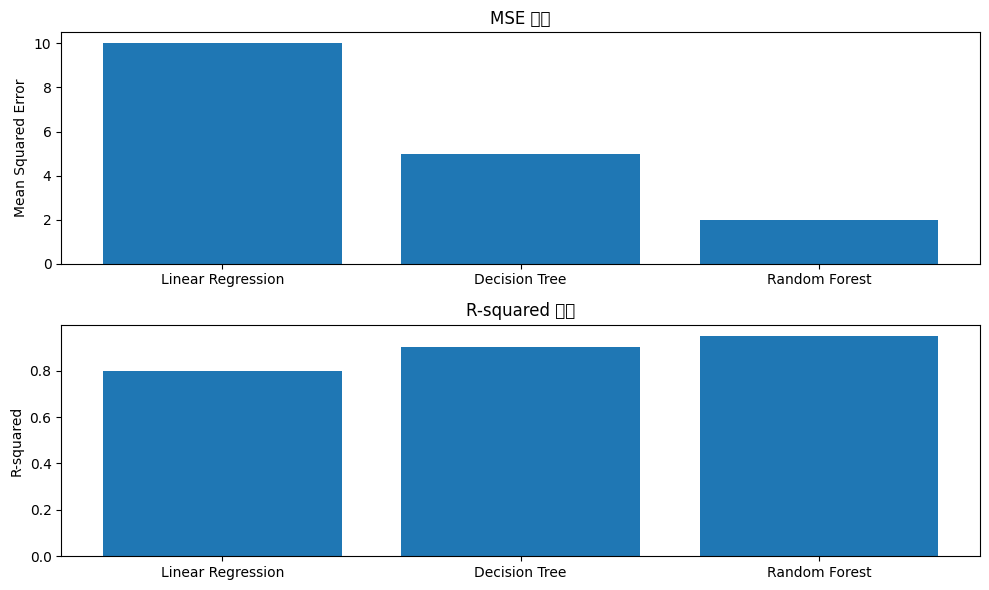

In [71]:
# 가상의 성능 지표 데이터 
mse_scores = [10, 5, 2]  # 선형 회귀, 의사결정나무, 랜덤 포레스트 순
r2_scores = [0.8, 0.9, 0.95]

# 모델 이름 설정
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest']

# x축 값 설정
x = np.arange(len(model_names))

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))

# MSE 점수 비교
plt.subplot(2, 1, 1)
plt.bar(x, mse_scores)
plt.xticks(x, model_names)
plt.ylabel('Mean Squared Error')
plt.title('MSE 비교')

# R-squared 점수 비교
plt.subplot(2, 1, 2)
plt.bar(x, r2_scores)
plt.xticks(x, model_names)
plt.ylabel('R-squared')
plt.title('R-squared 비교')

plt.tight_layout()
plt.show()